# 14_Phase 3 Analysis (VALIDATION)

Written by: Rupesh Kumar Dey


Notebook used for model validation of Phase 3 analysis. Stage 1 Developed models are tested on Set 5's validation images. 

## Importing required Libraries

In [1]:
!pip install tensorflow_hub
!pip install seaborn

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing python Libraries
# General / plotting libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image Libraries
from PIL import Image

# File System Libraries
import os
import sys
import copy
from copy import deepcopy

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from HelperFunctions import *

In [3]:
# Setting project parent directory path 
projectPath = "/notebooks"

## Model Development - AugModels

#### Dataset Loading 

### 14_BaseModel1_CLAHE: Base Model 1 with Image Processing CLAHE

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

2022-08-31 10:24:58.445278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 10:24:58.490721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 10:24:58.491169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 10:24:58.492681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 10:24:58.493107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

600/600 [==============================] - 11s 15ms/step
Confusion Matrix:


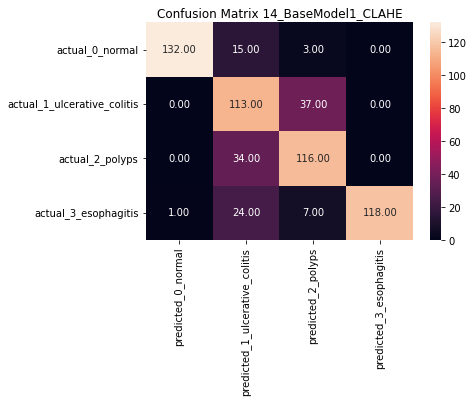

In [5]:
# Load best model from checkpoint folder
BaseModel1_CLAHE = createBaseModel(optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/01_BaseModel1_CLAHE/checkpoint/01_BaseModel1_CLAHE.ckpt"
loadModel(BaseModel1_CLAHE,checkpointPath)
# Generate Results and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel1_CLAHE, test_data, "14_BaseModel1_CLAHE" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "ValResults/14_BaseModel1_CLAHE/results/confusionMatrix/14_BaseModel1_CLAHE.jpg")
saveResults_csv(df_results,"ValResults/14_BaseModel1_CLAHE/results/classificationReport/14_BaseModel1_CLAHE.csv")

### 14_BaseModel2_MULTISCALE_tunedAdamLrScheduler: Base Model 2 with Image Processing MULTISCALE (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [6]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 5s 8ms/step
Confusion Matrix:


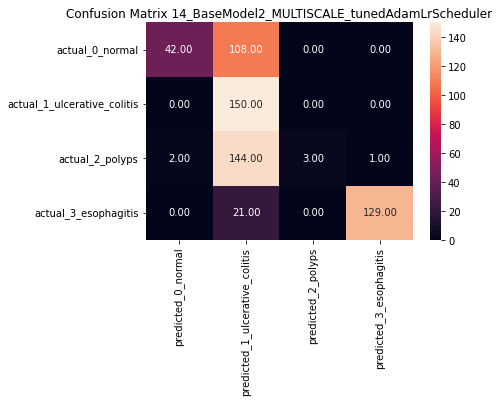

In [7]:
# Load best model from checkpoint folder
BaseModel2_MULTISCALE_tunedAdamLrScheduler = createBaseModel2(optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler/checkpoint/02_BaseModel2_MULTISCALE_tunedAdamLrScheduler.ckpt"
loadModel(BaseModel2_MULTISCALE_tunedAdamLrScheduler,checkpointPath)
# Generate Results and save
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel2_MULTISCALE_tunedAdamLrScheduler, test_data, "14_BaseModel2_MULTISCALE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "ValResults/14_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/confusionMatrix/14_BaseModel2_MULTISCALE_tunedAdamLrScheduler.jpg")
saveResults_csv(df_results,"ValResults/14_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/classificationReport/14_BaseModel2_MULTISCALE_tunedAdamLrScheduler.csv")

### 14_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdam: Transfer Learning with ResNet50V1 model on MULTISCALE Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 10s 14ms/step
Confusion Matrix:


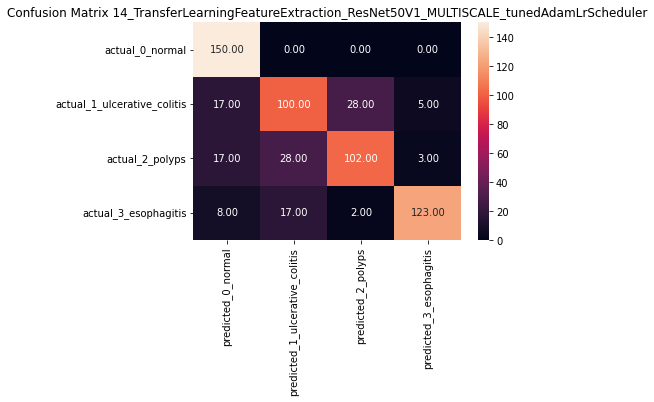

In [9]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/03_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/checkpoint/03_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler,checkpointPath)
# Generate Results and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler, test_data, "14_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "ValResults/14_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/results/confusionMatrix/14_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.jpg")
saveResults_csv(df_results,"ValResults/14_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/results/classificationReport/14_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.csv")

### 14_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam: Transfer Learning with ResNet50V2 model on NORMAL Image (Optimizer - Adam + LrScheduler)

In [10]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 9s 13ms/step
Confusion Matrix:


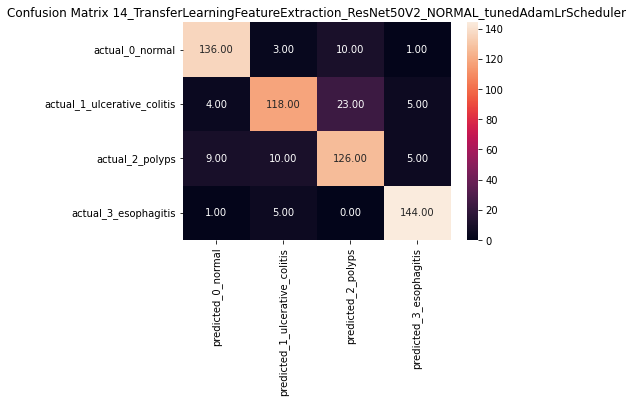

In [11]:
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/checkpoint/04_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler,checkpointPath)
# Generate Results and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler, test_data, "14_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "ValResults/14_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/14_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.jpg")
saveResults_csv(df_results,"ValResults/14_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/classificationReport/14_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.csv")

### 14_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [12]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 6s 10ms/step
Confusion Matrix:


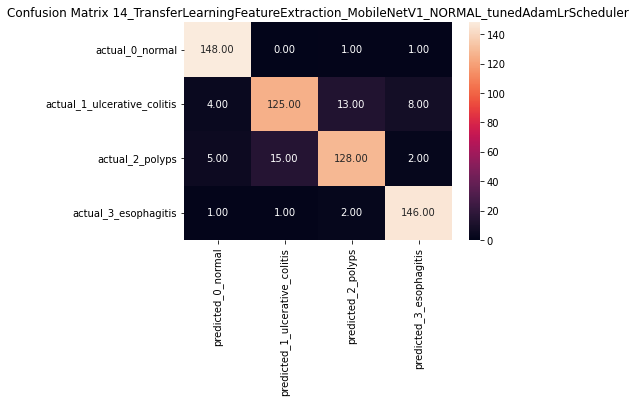

In [13]:
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler,checkpointPath)
# Generate Results and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler, test_data, "14_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "ValResults/14_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/14_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.jpg")
saveResults_csv(df_results,"ValResults/14_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/classificationReport/14_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.csv")

### 14_TransferLearningFeatureExtraction_MobileNetV2_CLAHE: Transfer Learning with MobileNetV2 model on CLAHE Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [14]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 11ms/step
Confusion Matrix:


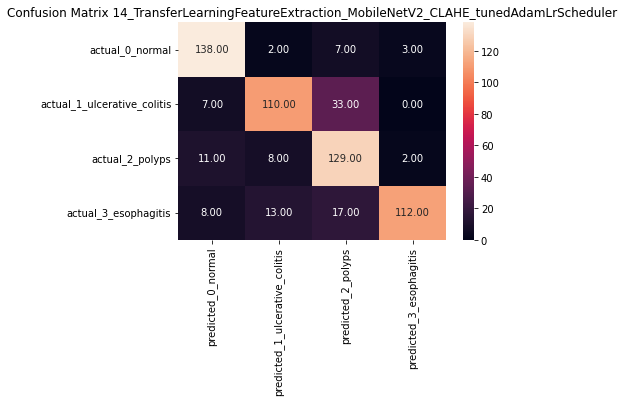

In [15]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/06_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/checkpoint/06_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler,checkpointPath)
# Generate Results and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler, test_data, "14_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "ValResults/14_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/14_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.jpg")
saveResults_csv(df_results,"ValResults/14_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/results/classificationReport/14_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.csv")


### 14_TransferLearningFineTuning_ResNet50V1_CLAHE: Transfer Learning with ResNet50V1 model on CLAHE Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [16]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 9s 13ms/step
Confusion Matrix:


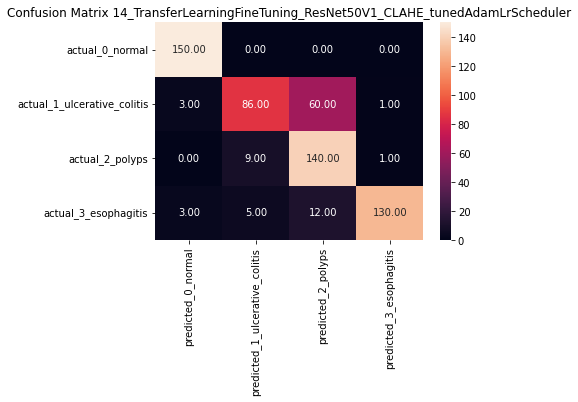

In [17]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/checkpoint/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler,checkpointPath)
# Generate Results and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler, test_data, "14_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "ValResults/14_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/14_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.jpg")
saveResults_csv(df_results,"ValResults/14_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/classificationReport/14_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.csv")

### 14_TransferLearningFineTuning_ResNet50V2_RAYLEIGH: Transfer Learning with ResNet50V2 model on RAYLEIGH Image

#### Dataset Loading 

In [18]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 9s 13ms/step
Confusion Matrix:


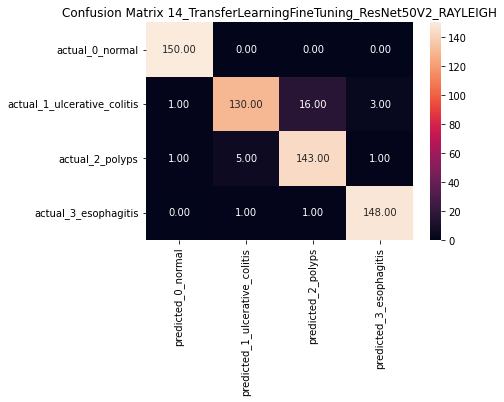

In [19]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V2_RAYLEIGH = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/08_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/checkpoint/08_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V2_RAYLEIGH,checkpointPath)
# Generate Results and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V2_RAYLEIGH, test_data, "14_TransferLearningFineTuning_ResNet50V2_RAYLEIGH" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "ValResults/14_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/results/confusionMatrix/14_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.jpg")
saveResults_csv(df_results,"ValResults/14_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/results/classificationReport/14_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.csv")

### 14_TransferLearningFineTuning_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image

#### Dataset Loading 

In [20]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 6s 10ms/step
Confusion Matrix:


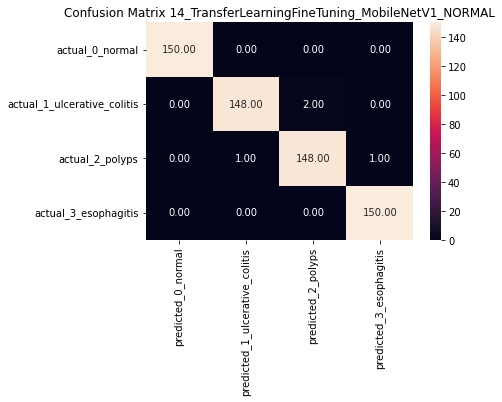

In [21]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV1_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/09_TransferLearningFineTuning_MobileNetV1_NORMAL/checkpoint/09_TransferLearningFineTuning_MobileNetV1_NORMAL.ckpt"
loadModel(TransferLearningFineTuning_MobileNetV1_NORMAL,checkpointPath)
# Generate Results and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_MobileNetV1_NORMAL, test_data, "14_TransferLearningFineTuning_MobileNetV1_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "ValResults/14_TransferLearningFineTuning_MobileNetV1_NORMAL/results/confusionMatrix/14_TransferLearningFineTuning_MobileNetV1_NORMAL.jpg")
saveResults_csv(df_results,"ValResults/14_TransferLearningFineTuning_MobileNetV1_NORMAL/results/classificationReport/14_TransferLearningFineTuning_MobileNetV1_NORMAL.csv")

### 14_TransferLearningFineTuning_MobileNetV2_NORMAL: Transfer Learning with MobileNetV2 model on NORMAL Image

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 11ms/step
Confusion Matrix:


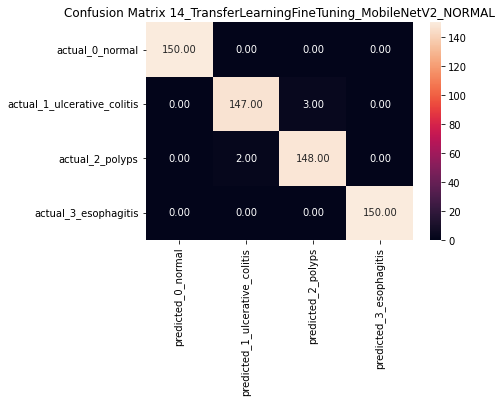

In [22]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV2_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/10_TransferLearningFineTuning_MobileNetV2_NORMAL/checkpoint/10_TransferLearningFineTuning_MobileNetV2_NORMAL.ckpt"
loadModel(TransferLearningFineTuning_MobileNetV2_NORMAL,checkpointPath)
# Generate Results and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_MobileNetV2_NORMAL, test_data, "14_TransferLearningFineTuning_MobileNetV2_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "ValResults/14_TransferLearningFineTuning_MobileNetV2_NORMAL/results/confusionMatrix/14_TransferLearningFineTuning_MobileNetV2_NORMAL.jpg")
saveResults_csv(df_results,"ValResults/14_TransferLearningFineTuning_MobileNetV2_NORMAL/results/classificationReport/14_TransferLearningFineTuning_MobileNetV2_NORMAL.csv")